Compressão do número de cores na imagem utilizando k-means (não supervisionada)

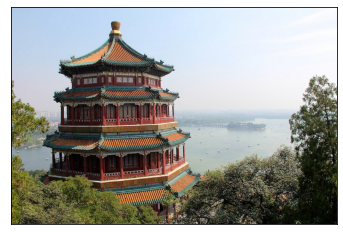

In [ ]:
# Note: this requires the ``pillow`` package to be installed
#%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [ ]:
china.shape

(427, 640, 3)

In [ ]:
#normalizar as cores entre 0 e 1
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
#Treinar e prever as novas cores com base no kmeans

#Algoritmo necessita que os valores sejam colocados entre 0 e 1
data = china / 255.0
#algoritmo necessita que a mtriz seja transformada num conjunto
data = data.reshape(427*640,3)

import warnings; 
warnings.simplefilter('ignore');

from sklearn.cluster import MiniBatchKMeans #k-means 
kmeans16 = MiniBatchKMeans(16)
kmeans16.fit(data)
novas_cores16 = kmeans16.cluster_centers_[kmeans16.predict(data)]
#print(kmeans.cluster_centers_*255)

from sklearn.cluster import MiniBatchKMeans #k-means 
kmeans2 = MiniBatchKMeans(2)
kmeans2.fit(data)
novas_cores2 = kmeans2.cluster_centers_[kmeans2.predict(data)]
#print(kmeans.cluster_centers_*255)


Text(0.5, 1.0, '2')

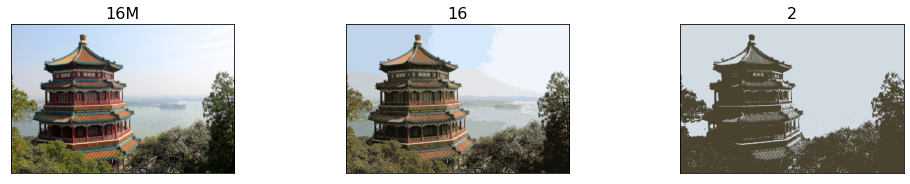

In [ ]:
nova_china16 = novas_cores16.reshape(china.shape)
nova_china2 = novas_cores2.reshape(china.shape)

fig , ax = plt.subplots(1,3, figsize=(16,6), subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace = 0.5)
ax[0].imshow(china)
ax[0].set_title('16M', size=16)
ax[1].imshow(nova_china16)
ax[1].set_title('16', size=16)
ax[2].imshow(nova_china2)
ax[2].set_title('2', size=16)

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html